In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 2,599,086
Trainable params: 2,599,086
Non-trainable params: 0
_________________________________________________________________


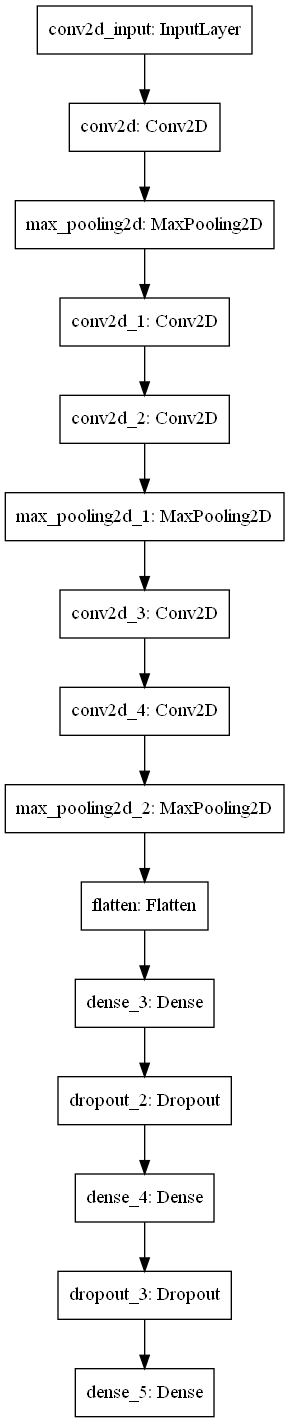

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, y_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

model = keras.models.Sequential([
    keras.layers.Conv2D(64,(7,7), activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256,(3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(256,(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

plot_model(model)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [24]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print('Train samples:', train_images.shape, train_labels.shape)
print('Test samples:', test_images.shape, test_labels.shape)

170500096/170498071 [==============================] - 50s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


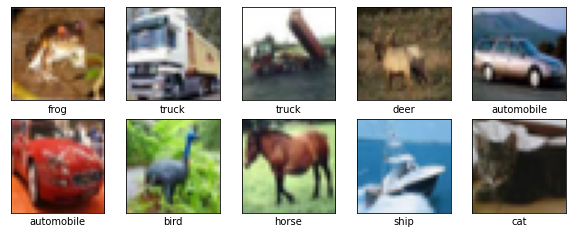

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

In [26]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [27]:
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

In [28]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [29]:
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
print('train_labels: ', np.shape(train_labels))

train_labels:  (50000, 10)


In [30]:
model = Sequential(name='CIFAR10_CNN')

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3),
                padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [32]:
history = model.fit(train_images, train_labels, 
                   epochs=35,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=callbacks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 36s 910us/sample - loss: 1.6538 - accuracy: 0.3988 - val_loss: 1.3512 - val_accuracy: 0.5233
Epoch 2/35
40000/40000 [==============================] - 36s 894us/sample - loss: 1.2743 - accuracy: 0.5461 - val_loss: 1.1738 - val_accuracy: 0.6001
Epoch 3/35
40000/40000 [==============================] - 36s 896us/sample - loss: 1.1212 - accuracy: 0.6068 - val_loss: 1.0836 - val_accuracy: 0.6294
Epoch 4/35
40000/40000 [==============================] - 36s 892us/sample - loss: 1.0339 - accuracy: 0.6383 - val_loss: 1.0421 - val_accuracy: 0.6381
Epoch 5/35
40000/40000 [==============================] - 36s 895us/sample - loss: 0.9649 - accuracy: 0.6621 - val_loss: 0.9660 - val_accuracy: 0.6695
Epoch 6/35
40000/40000 [==============================] - 36s 891us/sample - loss: 0.9141 - accuracy: 0.6791 - val_loss: 0.9094 - val_accuracy: 0.6822
Epoch 7/35
40000/40000 [====================

In [33]:
loss, acc = model.evaluate(test_images, test_labels)
print('Test loss: ', loss)
print('Test accuracy: ', acc)

10000/10000 [==============================] - 3s 260us/sample - loss: 0.8766 - accuracy: 0.7244
Test loss:  0.8766036075592041
Test accuracy:  0.7244


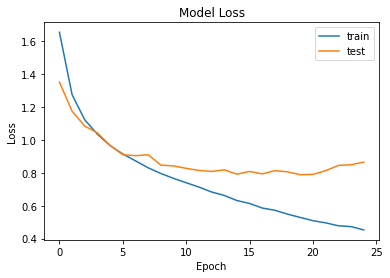

In [34]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc=0)
    
plt_show_loss(history)
plt.show()

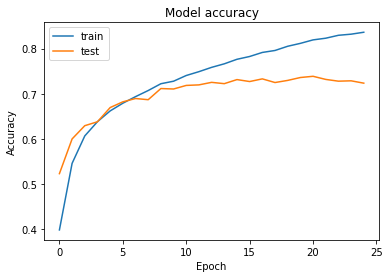

In [35]:
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc=0)
    
plt_show_acc(history)
plt.show()

In [36]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:0.2f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)]),
              color = color)

In [37]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

<function matplotlib.pyplot.show(close=None, block=None)>

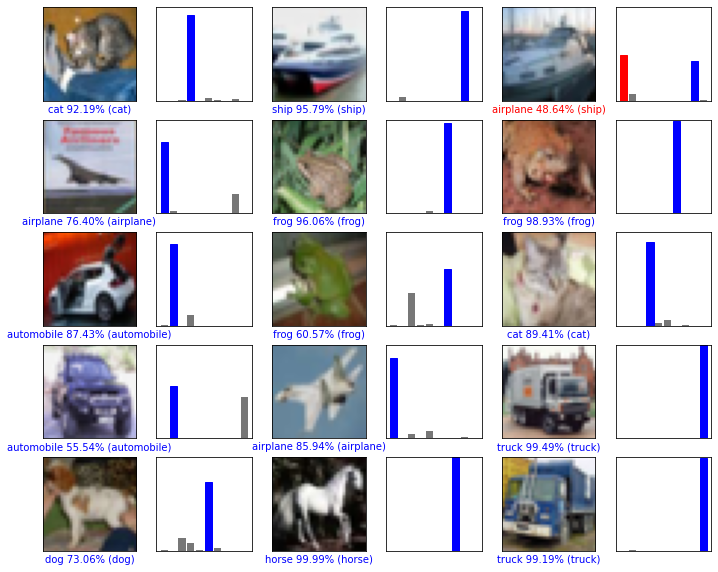

In [38]:
num_rows=5
num_cols=3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show